In [10]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm

df = pd.read_excel(r'C:\Users\piotr\Downloads\Football.xlsx')

df['Treat_After'] = df['ADOPTER'] * df['AFTER']

# Specify the regression model
X = df[['Treat_After', 'ADOPTER', 'AFTER']]
X = sm.add_constant(X)  # add constant term
y = df['Wins']  # replace 'OutcomeVariable' with the column you want to analyze

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9180
Date:                Mon, 16 Oct 2023   Prob (F-statistic):              0.434
Time:                        15:54:48   Log-Likelihood:                -539.64
No. Observations:                 171   AIC:                             1087.
Df Residuals:                     167   BIC:                             1100.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.1071      0.768     20.974      

In [13]:
df

,TEAM,YEAR,ADOPTER,AFTER,ADOPTION YEAR,LEAGUE,EU,NONEU,Wins,Losses,Treat_After
0,ACFiorentina,2013,1,0,2015.0,SA,1,0,19,11,0
1,ACFiorentina,2014,1,0,2015.0,SA,1,0,18,10,0
2,ACFiorentina,2015,1,1,2015.0,SA,1,0,18,10,1
3,ACFiorentina,2016,1,1,2015.0,SA,1,0,16,10,1
4,ACMilan,2015,1,1,2015.0,SA,1,0,15,11,1
...,...,...,...,...,...,...,...,...,...,...,...
166,SunderlandFC,2016,0,1,NaN,PL,1,0,6,26,0
167,Zenit,2013,0,0,NaN,PLR,1,0,19,5,0
168,Zenit,2014,0,0,NaN,PLR,1,0,20,3,0
169,Zenit,2015,0,1,NaN,PLR,1,0,17,5,0


In [12]:
# Specify the regression model
X_L = df[['Treat_After', 'ADOPTER', 'AFTER']]
X_L = sm.add_constant(X)  # add constant term
y_L = df['Losses']  # replace 'OutcomeVariable' with the column you want to analyze

# Fit the regression model
model_L = sm.OLS(y_L, X_L).fit()

# Print regression summary
print(model_L.summary())

                            OLS Regression Results                            
Dep. Variable:                 Losses   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.502
Date:                Mon, 16 Oct 2023   Prob (F-statistic):              0.216
Time:                        15:56:48   Log-Likelihood:                -504.51
No. Observations:                 171   AIC:                             1017.
Df Residuals:                     167   BIC:                             1030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.2679      0.625     16.419      

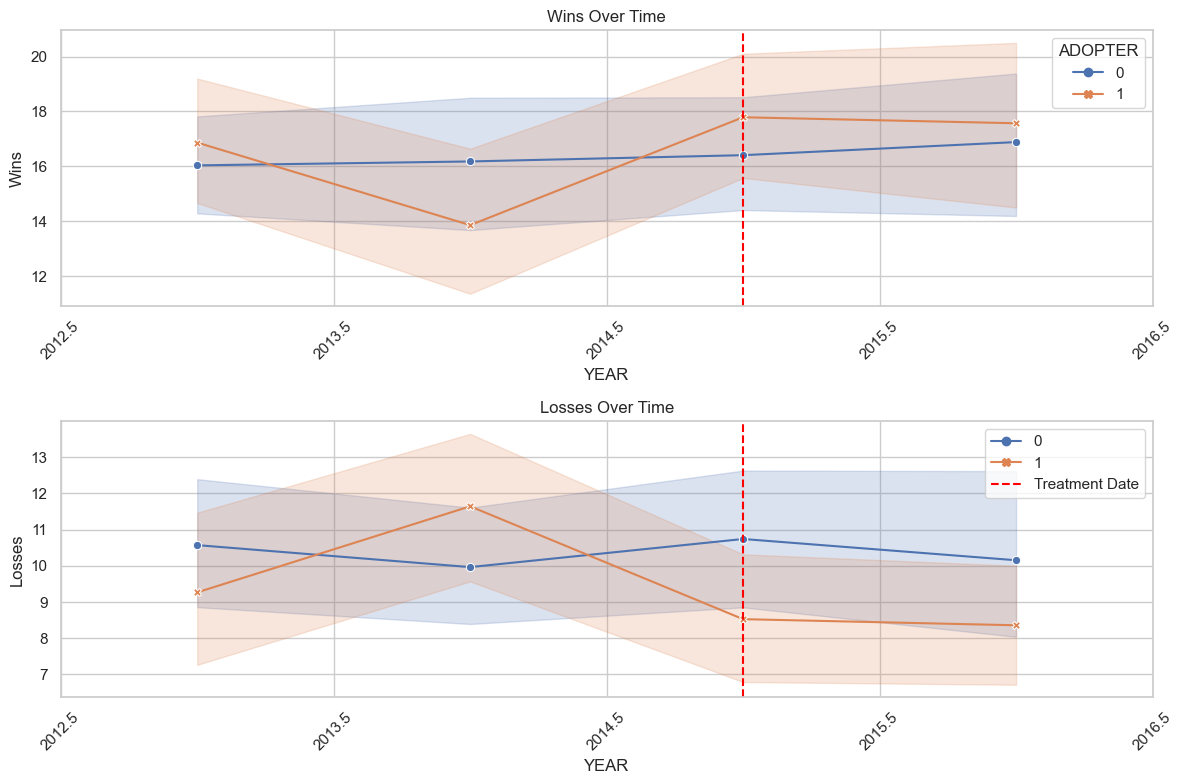

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data into a pandas DataFrame
df = pd.read_excel(r'C:\Users\piotr\Downloads\Football.xlsx')

# Group the data by team and year, and calculate the mean wins and losses
grouped_df = df.groupby(['TEAM', 'YEAR', 'ADOPTER'])[['Wins', 'Losses']].mean().reset_index()

# Set the style of seaborn visualization
sns.set(style="whitegrid")

# Create subplots for Wins and Losses
fig, axes = plt.subplots(nrows=2, figsize=(12, 8))

# Plot Wins over time
sns.lineplot(data=grouped_df, x='YEAR', y='Wins', hue='ADOPTER', style='ADOPTER', markers=True, dashes=False, ax=axes[0])
axes[0].set_title('Wins Over Time')
axes[0].set_ylabel('Wins')
axes[0].axvline(x=df['ADOPTION YEAR'].iloc[0], color='red', linestyle='--', label='Treatment Date')

# Plot Losses over time
sns.lineplot(data=grouped_df, x='YEAR', y='Losses', hue='ADOPTER', style='ADOPTER', markers=True, dashes=False, ax=axes[1])
axes[1].set_title('Losses Over Time')
axes[1].set_ylabel('Losses')
axes[1].axvline(x=df['ADOPTION YEAR'].iloc[0], color='red', linestyle='--', label='Treatment Date')

# Rotate x-axis labels for better visibility
for ax in axes:
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\piotr\AppData\Local\Temp\ipykernel_17328\1437540186.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


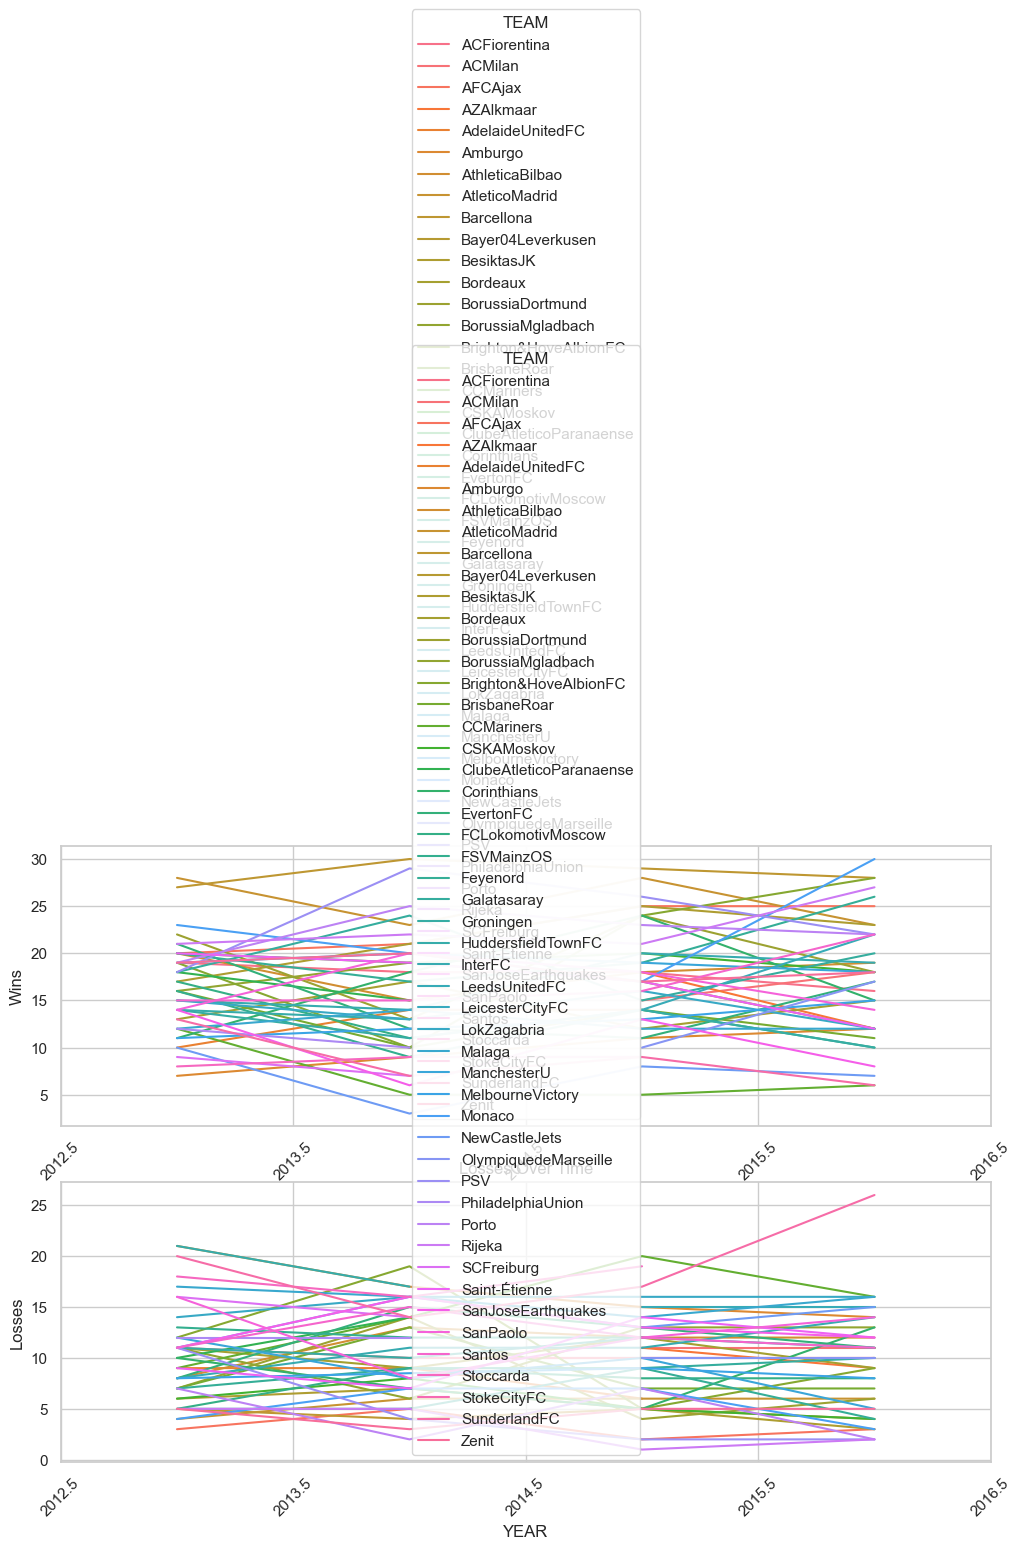

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data into a pandas DataFrame
df = pd.read_excel(r'C:\Users\piotr\Downloads\Football.xlsx')

# Group the data by team and year, and calculate the mean wins and losses
grouped_df = df.groupby(['TEAM', 'YEAR'])[['Wins', 'Losses']].mean().reset_index()

# Set the style of seaborn visualization
sns.set(style="whitegrid")

# Create subplots for Wins and Losses
fig, axes = plt.subplots(nrows=2, figsize=(12, 8))

# Plot Wins over time
sns.lineplot(data=grouped_df, x='YEAR', y='Wins', hue='TEAM', ax=axes[0])
axes[0].set_title('Wins Over Time')
axes[0].set_ylabel('Wins')

# Plot Losses over time
sns.lineplot(data=grouped_df, x='YEAR', y='Losses', hue='TEAM', ax=axes[1])
axes[1].set_title('Losses Over Time')
axes[1].set_ylabel('Losses')

# Rotate x-axis labels for better visibility
for ax in axes:
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_xticklabels(ax.get_xticks(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
